**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

**Load Data**

In [4]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/House Price Prediction/Input/train.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (1460, 81)

First few rows:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Initial Data Exploration**

In [5]:
print("Dataset Info:")
print(df.info())
print("\nTarget variable (SalePrice) statistics:")
print(df['SalePrice'].describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  

In [6]:
# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")



Duplicate rows: 0


**Missing Values Analysis**

In [7]:
def analyze_missing_values(df):
    """Analyze missing values in the dataset"""
    missing_data = df.isnull().sum()
    missing_percent = 100 * missing_data / len(df)
    missing_table = pd.DataFrame({
        'Missing Count': missing_data,
        'Percentage': missing_percent
    })
    missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    return missing_table

missing_analysis = analyze_missing_values(df)
print("Missing Values Analysis:")
print(missing_analysis)

Missing Values Analysis:
              Missing Count  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
MasVnrType              872   59.726027
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
GarageCond               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtQual                 37    2.534247
BsmtCond                 37    2.534247
BsmtFinType1             37    2.534247
MasVnrArea                8    0.547945
Electrical                1    0.068493


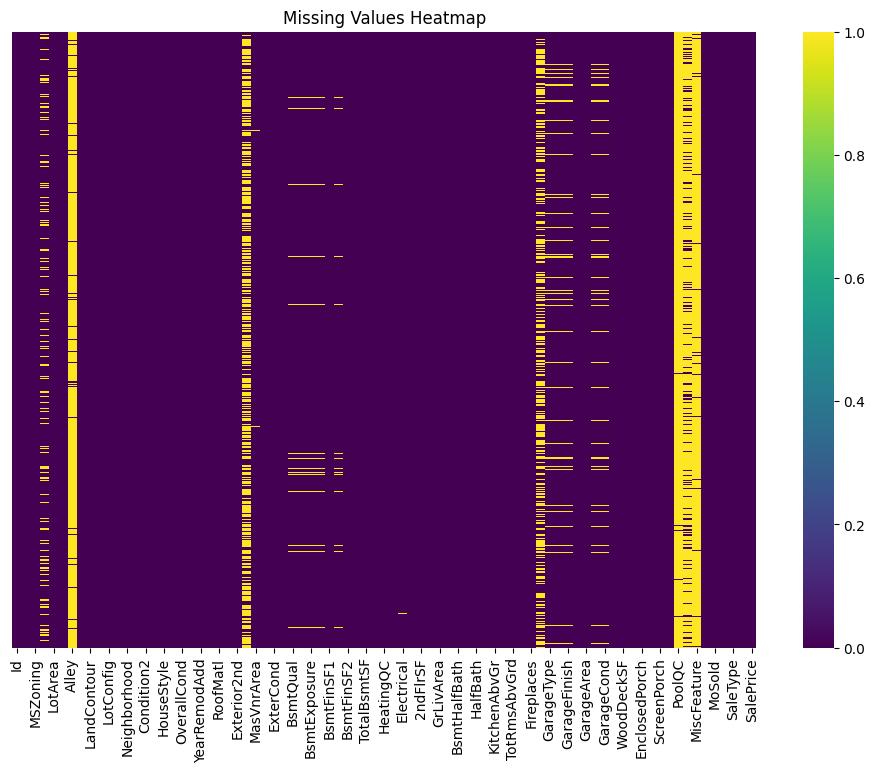

In [8]:
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**Separate Numerical and Categorical Features**

In [9]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
# Remove Id and target variable from feature lists
if 'Id' in numerical_cols:
    numerical_cols.remove('Id')
if 'SalePrice' in numerical_cols:
    numerical_cols.remove('SalePrice')

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")


Numerical columns (36): ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Categorical columns (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Ga

**Handle Missing Values - Categorical Features**

In [11]:
def handle_categorical_missing(df):
    """Handle missing values in categorical features"""
    df_processed = df.copy()

    # Features where NA means "None" or "No Feature"
    none_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

    for feature in none_features:
        if feature in df_processed.columns:
            df_processed[feature] = df_processed[feature].fillna('None')

    # For other categorical features, fill with mode
    other_categorical = [col for col in categorical_cols if col not in none_features]
    for feature in other_categorical:
        if df_processed[feature].isnull().sum() > 0:
            mode_value = df_processed[feature].mode()[0] if len(df_processed[feature].mode()) > 0 else 'Unknown'
            df_processed[feature] = df_processed[feature].fillna(mode_value)
            print(f"Filled {feature} with mode: {mode_value}")

    return df_processed

df_processed = handle_categorical_missing(df)

Filled MasVnrType with mode: BrkFace
Filled Electrical with mode: SBrkr


**Handle Missing Values - Numerical Features**

In [12]:
def handle_numerical_missing(df):
    """Handle missing values in numerical features"""
    df_processed = df.copy()

    # Features where NA means 0
    zero_features = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                    'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea',
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                    'PoolArea', 'MiscVal']

    for feature in zero_features:
        if feature in df_processed.columns:
            df_processed[feature] = df_processed[feature].fillna(0)

    # For LotFrontage, fill with median based on neighborhood
    if 'LotFrontage' in df_processed.columns and df_processed['LotFrontage'].isnull().sum() > 0:
        df_processed['LotFrontage'] = df_processed.groupby('Neighborhood')['LotFrontage'].transform(
            lambda x: x.fillna(x.median())
        )

    # For any remaining numerical features, fill with median
    remaining_numerical = [col for col in numerical_cols if df_processed[col].isnull().sum() > 0]
    for feature in remaining_numerical:
        median_value = df_processed[feature].median()
        df_processed[feature] = df_processed[feature].fillna(median_value)
        print(f"Filled {feature} with median: {median_value}")

    return df_processed

df_processed = handle_numerical_missing(df_processed)


In [13]:
# Verify no missing values remain
print("Missing values after handling:")
print(df_processed.isnull().sum().sum())

Missing values after handling:
0


**Outlier Detection and Treatment**

In [14]:
def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [15]:
# Analyze outliers in key numerical features
key_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
               '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'SalePrice']

outlier_summary = {}
for feature in key_features:
    if feature in df_processed.columns:
        outliers, lower, upper = detect_outliers_iqr(df_processed, feature)
        outlier_summary[feature] = {
            'count': len(outliers),
            'percentage': len(outliers) / len(df_processed) * 100,
            'lower_bound': lower,
            'upper_bound': upper
        }

outlier_df = pd.DataFrame(outlier_summary).T
print("Outlier Analysis:")
print(outlier_df)

Outlier Analysis:
             count  percentage  lower_bound  upper_bound
LotFrontage   93.0    6.369863       30.000      110.000
LotArea       69.0    4.726027     1481.500    17673.500
MasVnrArea    98.0    6.712329     -246.375      410.625
BsmtFinSF1     7.0    0.479452    -1068.375     1780.625
TotalBsmtSF   61.0    4.178082       42.000     2052.000
1stFlrSF      20.0    1.369863      118.125     2155.125
2ndFlrSF       2.0    0.136986    -1092.000     1820.000
GrLivArea     31.0    2.123288      158.625     2747.625
GarageArea    21.0    1.438356      -27.750      938.250
WoodDeckSF    32.0    2.191781     -252.000      420.000
SalePrice     61.0    4.178082     3937.500   340037.500


**Visualize Outliers and Target Distribution**

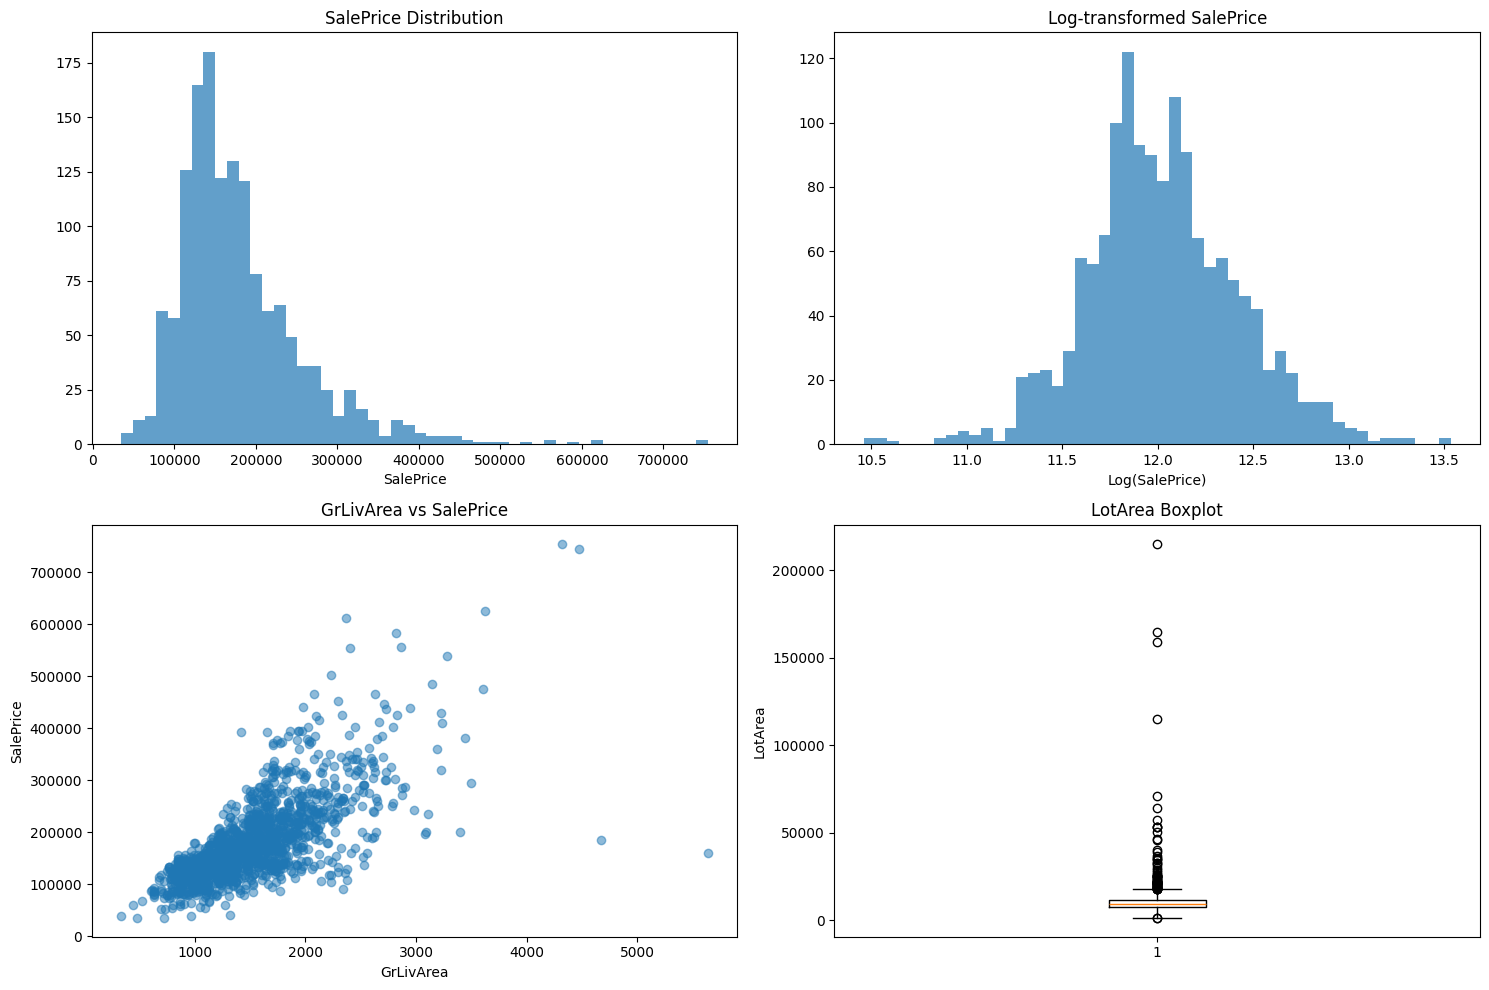

In [16]:
# Create subplots for outlier visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# SalePrice distribution
axes[0,0].hist(df_processed['SalePrice'], bins=50, alpha=0.7)
axes[0,0].set_title('SalePrice Distribution')
axes[0,0].set_xlabel('SalePrice')

# Log-transformed SalePrice
axes[0,1].hist(np.log1p(df_processed['SalePrice']), bins=50, alpha=0.7)
axes[0,1].set_title('Log-transformed SalePrice')
axes[0,1].set_xlabel('Log(SalePrice)')

# GrLivArea vs SalePrice
axes[1,0].scatter(df_processed['GrLivArea'], df_processed['SalePrice'], alpha=0.5)
axes[1,0].set_title('GrLivArea vs SalePrice')
axes[1,0].set_xlabel('GrLivArea')
axes[1,0].set_ylabel('SalePrice')

# LotArea boxplot
axes[1,1].boxplot(df_processed['LotArea'])
axes[1,1].set_title('LotArea Boxplot')
axes[1,1].set_ylabel('LotArea')

plt.tight_layout()
plt.show()

**Handle Extreme Outliers**

In [17]:
def handle_outliers(df, method='cap'):
    """Handle outliers by capping or removing"""
    df_processed = df.copy()

    # Remove extreme outliers for specific features
    # Remove houses with very large living area but low price (likely data errors)
    df_processed = df_processed.drop(df_processed[(df_processed['GrLivArea'] > 4000) &
                                                (df_processed['SalePrice'] < 300000)].index)

    # Cap outliers for specific features using IQR method
    features_to_cap = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
                      'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

    for feature in features_to_cap:
        if feature in df_processed.columns:
            Q1 = df_processed[feature].quantile(0.25)
            Q3 = df_processed[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap outliers
            df_processed[feature] = df_processed[feature].clip(lower=lower_bound, upper=upper_bound)

    return df_processed

df_processed = handle_outliers(df_processed)
print(f"Dataset shape after outlier handling: {df_processed.shape}")

Dataset shape after outlier handling: (1458, 81)


**Feature Engineering - New Features**

In [18]:
def create_new_features(df):
    """Create new features based on domain knowledge"""
    df_processed = df.copy()

    # Age-related features
    df_processed['HouseAge'] = df_processed['YrSold'] - df_processed['YearBuilt']
    df_processed['YearsSinceRemodel'] = df_processed['YrSold'] - df_processed['YearRemodAdd']
    df_processed['IsRemodeled'] = (df_processed['YearRemodAdd'] != df_processed['YearBuilt']).astype(int)

    # Total area features
    df_processed['TotalSF'] = df_processed['1stFlrSF'] + df_processed['2ndFlrSF'] + df_processed['TotalBsmtSF']
    df_processed['TotalBathrooms'] = (df_processed['FullBath'] +
                                     0.5 * df_processed['HalfBath'] +
                                     df_processed['BsmtFullBath'] +
                                     0.5 * df_processed['BsmtHalfBath'])

    # Porch and outdoor features
    df_processed['TotalPorchSF'] = (df_processed['OpenPorchSF'] +
                                   df_processed['EnclosedPorch'] +
                                   df_processed['3SsnPorch'] +
                                   df_processed['ScreenPorch'])
    # Boolean features
    df_processed['HasPool'] = (df_processed['PoolArea'] > 0).astype(int)
    df_processed['HasGarage'] = (df_processed['GarageArea'] > 0).astype(int)
    df_processed['HasBsmt'] = (df_processed['TotalBsmtSF'] > 0).astype(int)
    df_processed['HasFireplace'] = (df_processed['Fireplaces'] > 0).astype(int)
    df_processed['Has2ndFloor'] = (df_processed['2ndFlrSF'] > 0).astype(int)

    # Quality indices
    quality_features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
                       'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
                       'FireplaceQu', 'GarageQual', 'GarageCond']

    # Convert quality features to numerical
    quality_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}

    for feature in quality_features:
        if feature in df_processed.columns:
            if df_processed[feature].dtype == 'object':
                df_processed[feature + '_num'] = df_processed[feature].map(quality_map).fillna(0)

    # Overall quality index
    quality_cols = [col for col in df_processed.columns if col.endswith('_num')]
    if quality_cols:
        df_processed['QualityIndex'] = df_processed[quality_cols].mean(axis=1)
    # Price per square foot (for validation later)
    df_processed['PricePerSF'] = df_processed['SalePrice'] / df_processed['TotalSF']

    return df_processed

df_processed = create_new_features(df_processed)
print(f"New features created. Dataset shape: {df_processed.shape}")

New features created. Dataset shape: (1458, 103)


**Encode Categorical Variables**

In [19]:
def encode_categorical_features(df):
    """Encode categorical features"""
    df_processed = df.copy()

    # Binary categorical features - use Label Encoding
    binary_features = ['Street', 'CentralAir', 'PavedDrive']

    for feature in binary_features:
        if feature in df_processed.columns:
            le = LabelEncoder()
            df_processed[feature + '_encoded'] = le.fit_transform(df_processed[feature])

    # Ordinal features - manual mapping
    ordinal_mappings = {
        'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
        'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
        'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
        'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
        'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
        'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
        'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
        'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
        'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
        'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0},
        'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0}
    }
    for feature, mapping in ordinal_mappings.items():
        if feature in df_processed.columns:
            df_processed[feature + '_encoded'] = df_processed[feature].map(mapping)

    # One-hot encode nominal categorical features
    nominal_features = ['MSZoning', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                       'Foundation', 'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

    # Select features that exist and have reasonable number of categories
    features_to_encode = []
    for feature in nominal_features:
        if feature in df_processed.columns:
            unique_values = df_processed[feature].nunique()
            if unique_values <= 20:  # Avoid features with too many categories
                features_to_encode.append(feature)

    # One-hot encode
    df_encoded = pd.get_dummies(df_processed, columns=features_to_encode, prefix=features_to_encode)

    return df_encoded

df_processed = encode_categorical_features(df_processed)
print(f"After encoding categorical features. Dataset shape: {df_processed.shape}")

After encoding categorical features. Dataset shape: (1458, 219)


**Feature Selection and Correlation Analysis**

Top 20 features correlated with SalePrice:
SalePrice              1.000000
TotalSF                0.829859
OverallQual            0.795774
GrLivArea              0.734968
QualityIndex           0.725489
ExterQual_encoded      0.686756
ExterQual_num          0.686756
PricePerSF             0.670205
KitchenQual_encoded    0.662236
KitchenQual_num        0.662236
GarageCars             0.641047
TotalBsmtSF            0.640079
TotalBathrooms         0.635896
1stFlrSF               0.631530
GarageArea             0.629217
BsmtQual_encoded       0.586674
BsmtQual_num           0.586674
FullBath               0.562165
TotRmsAbvGrd           0.537769
HouseAge               0.524067
Name: SalePrice, dtype: float64


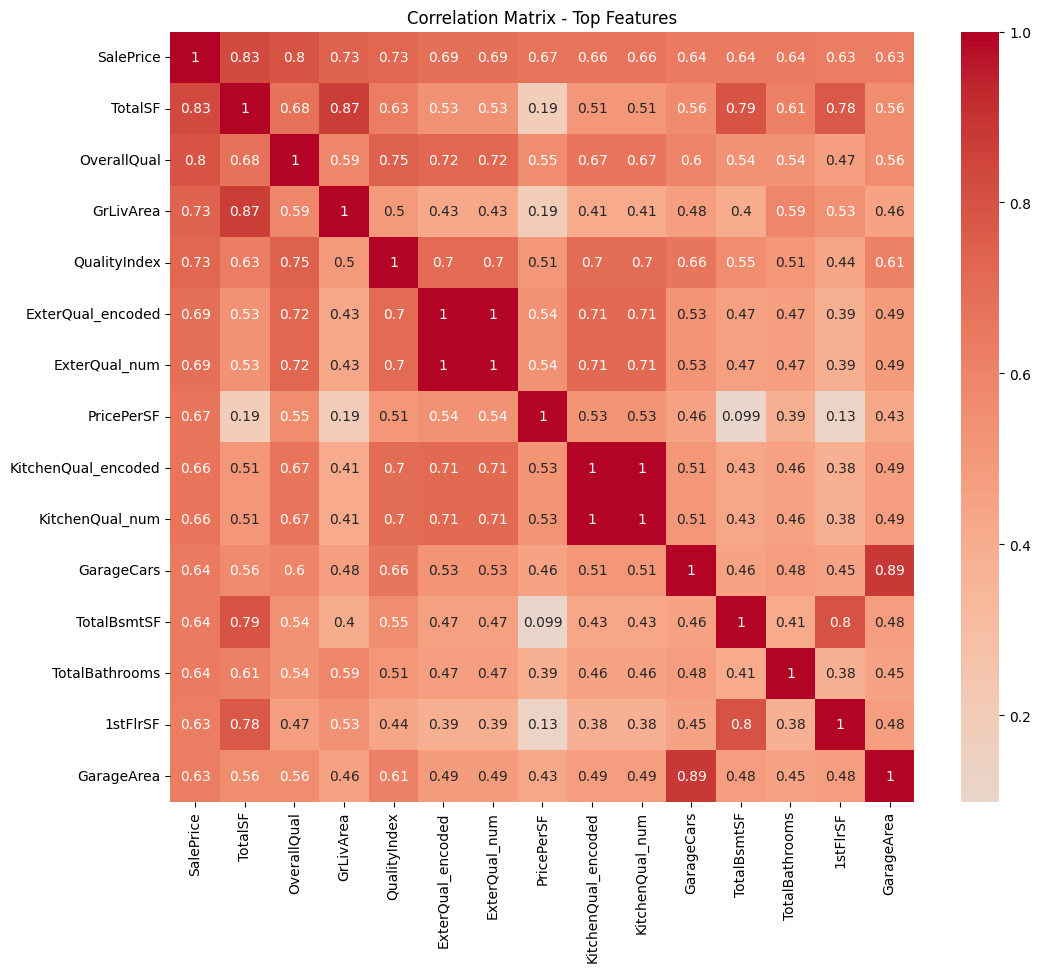

In [20]:
# Calculate correlation with target variable
numerical_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
if 'Id' in numerical_features:
    numerical_features.remove('Id')

correlations = df_processed[numerical_features].corr()['SalePrice'].abs().sort_values(ascending=False)

print("Top 20 features correlated with SalePrice:")
print(correlations.head(20))

# Visualize correlation matrix for top features
top_features = correlations.head(15).index.tolist()
plt.figure(figsize=(12, 10))
sns.heatmap(df_processed[top_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Top Features')
plt.show()


**Remove Highly Correlated Features**

In [22]:
def remove_highly_correlated_features(df, threshold=0.95):
    """Remove features that are highly correlated with each other"""
    df_processed = df.copy()

    # Calculate correlation matrix
    numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    if 'Id' in numerical_cols:
        numerical_cols.remove('Id')
    if 'SalePrice' in numerical_cols:
        numerical_cols.remove('SalePrice')

    corr_matrix = df_processed[numerical_cols].corr().abs()

    # Find highly correlated pairs
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features to drop
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    print(f"Removing {len(to_drop)} highly correlated features: {to_drop}")

    # Drop the features
    df_processed = df_processed.drop(columns=to_drop)

    return df_processed, to_drop

df_processed, dropped_features = remove_highly_correlated_features(df_processed)
print(f"After removing highly correlated features. Dataset shape: {df_processed.shape}")

Removing 0 highly correlated features: []
After removing highly correlated features. Dataset shape: (1458, 203)


**Final Data Preparation**

In [23]:
# Prepare final dataset
def prepare_final_dataset(df):
    """Prepare the final dataset for modeling"""
    df_final = df.copy()

    # Remove unnecessary columns
    columns_to_remove = ['Id']  # Add any other columns you want to remove
    columns_to_remove = [col for col in columns_to_remove if col in df_final.columns]
    df_final = df_final.drop(columns=columns_to_remove)

    # Separate features and target
    if 'SalePrice' in df_final.columns:
        X = df_final.drop('SalePrice', axis=1)
        y = df_final['SalePrice']
    else:
        X = df_final
        y = None

    # Get feature names
    feature_names = X.columns.tolist()

    return X, y, feature_names

X, y, feature_names = prepare_final_dataset(df_processed)

print(f"Final dataset shape: {X.shape}")
print(f"Target variable shape: {y.shape if y is not None else 'N/A'}")
print(f"Number of features: {len(feature_names)}")

Final dataset shape: (1458, 201)
Target variable shape: (1458,)
Number of features: 201


**Data Summary and Validation**

In [27]:
print("=== DATA PREPROCESSING SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final dataset shape: {X.shape}")
print(f"Features removed due to high correlation: {len(dropped_features)}")
print(f"Missing values handled")
print(f"Outliers handled")
print(f"New features created")
print(f"Categorical variables encoded")

# Display final feature types
print(f"\nFinal feature breakdown:")
print(f"Total features: {X.shape[1]}")

=== DATA PREPROCESSING SUMMARY ===
Original dataset shape: (1460, 81)
Final dataset shape: (1458, 201)
Features removed due to high correlation: 0
Missing values handled
Outliers handled
New features created
Categorical variables encoded

Final feature breakdown:
Total features: 201


In [28]:
# Check for any remaining missing values
if X.isnull().sum().sum() > 0:
    print(f"WARNING: {X.isnull().sum().sum()} missing values still present!")
else:
    print("No missing values in final dataset")

No missing values in final dataset


In [29]:
# Display some basic statistics
print(f"\nTarget variable (SalePrice) statistics:")
if y is not None:
    print(f"Mean: ${y.mean():,.2f}")
    print(f"Median: ${y.median():,.2f}")
    print(f"Std: ${y.std():,.2f}")
    print(f"Min: ${y.min():,.2f}")
    print(f"Max: ${y.max():,.2f}")


Target variable (SalePrice) statistics:
Mean: $180,932.92
Median: $163,000.00
Std: $79,495.06
Min: $34,900.00
Max: $755,000.00
